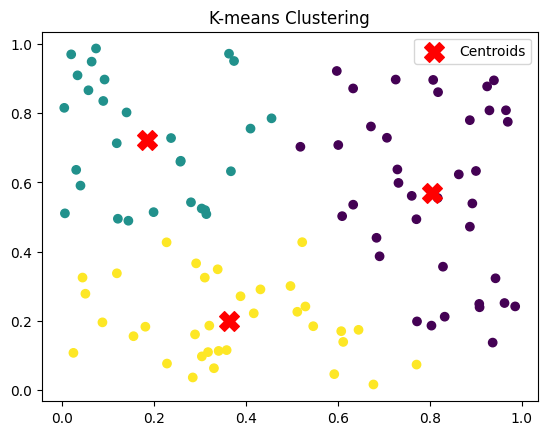

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(42)
data = np.random.rand(100, 2)

# Function to initialize centroids randomly
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

# Function to assign each data point to the nearest centroid
def assign_to_centroids(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids based on assigned points
def update_centroids(data, labels, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[labels == i], axis=0)
    return centroids

# Function to implement K-means algorithm
def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):
        labels = assign_to_centroids(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Run K-means on the sample dataset
k = 3
labels, centroids = kmeans(data, k)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()
